In [118]:
import pandas as pd
import numpy as np

np.random.seed(42)
n = 1000

# Simulate features
age = np.random.randint(20, 60, size=n)
income = np.random.choice(['Low', 'Medium', 'High'], size=n, p=[0.3, 0.5, 0.2])
has_job = np.random.choice(['Yes', 'No'], size=n, p=[0.8, 0.2])
owns_house = np.random.choice(['Yes', 'No'], size=n, p=[0.6, 0.4])

# Simulate target based on some logic
buys_car = []
for i in range(n):
    if has_job[i] == 'Yes' and income[i] in ['Medium', 'High'] and age[i] > 25:
        buys_car.append('Yes')
    else:
        buys_car.append('No')

# Create DataFrame
df = pd.DataFrame({
    'Age': age,
    'Income': income,
    'HasJob': has_job,
    'OwnsHouse': owns_house,
    'BuysCar': buys_car
})

df


,Age,Income,HasJob,OwnsHouse,BuysCar
0,58,Low,No,No,No
1,48,High,Yes,Yes,Yes
2,34,High,Yes,No,Yes
3,27,Low,Yes,No,No
4,40,Low,Yes,Yes,No
...,...,...,...,...,...
995,27,Medium,Yes,Yes,Yes
996,47,Medium,Yes,Yes,Yes
997,50,Medium,Yes,Yes,Yes
998,28,High,Yes,No,Yes


In [119]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Income'] = le.fit_transform(df['Income'])
df['HasJob'] = le.fit_transform(df['HasJob'])
df['OwnsHouse'] = le.fit_transform(df['OwnsHouse'])
df['BuysCar'] = le.fit_transform(df['BuysCar'])
df

,Age,Income,HasJob,OwnsHouse,BuysCar
0,58,1,0,0,0
1,48,0,1,1,1
2,34,0,1,0,1
3,27,1,1,0,0
4,40,1,1,1,0
...,...,...,...,...,...
995,27,2,1,1,1
996,47,2,1,1,1
997,50,2,1,1,1
998,28,0,1,0,1


In [120]:
from sklearn.model_selection import train_test_split

In [121]:
X = df.drop('BuysCar',axis=1)
X.head()

,Age,Income,HasJob,OwnsHouse
0,58,1,0,0
1,48,0,1,1
2,34,0,1,0
3,27,1,1,0
4,40,1,1,1


In [122]:
y = df['BuysCar']
y.head()

0    0
1    1
2    1
3    0
4    0
Name: BuysCar, dtype: int32

In [123]:
x_train, x_test, y_train, y_test = train_test_split(X,y,train_size=0.8,random_state=1)

In [124]:
from sklearn.tree import DecisionTreeClassifier,plot_tree

In [125]:
model = DecisionTreeClassifier()
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [126]:
y_pred = model.predict(x_test)

In [127]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

1.0

In [128]:
#Age	Income	HasJob	OwnsHouse	BuysCar

def canIBuyCAR(age,income,hasjob,ownHouse):
    if model.predict([[age,income,hasjob,ownHouse]]):
        print('Yes you can Buy a CAR')
    else:
        print('You have to wait')

In [129]:
canIBuyCAR(50,2,0,1)

You have to wait


c:\Users\Jash\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


[Text(0.3333333333333333, 0.9, 'HasJob <= 0.5\ngini = 0.5\nsamples = 800\nvalue = [411.0, 389.0]\nclass = Not Buy'),
 Text(0.16666666666666666, 0.7, 'gini = 0.0\nsamples = 161\nvalue = [161, 0]\nclass = Not Buy'),
 Text(0.25, 0.8, 'True  '),
 Text(0.5, 0.7, 'Age <= 25.5\ngini = 0.476\nsamples = 639\nvalue = [250, 389]\nclass = Buy'),
 Text(0.41666666666666663, 0.8, '  False'),
 Text(0.3333333333333333, 0.5, 'gini = 0.0\nsamples = 102\nvalue = [102, 0]\nclass = Not Buy'),
 Text(0.6666666666666666, 0.5, 'Income <= 1.5\ngini = 0.399\nsamples = 537\nvalue = [148, 389]\nclass = Buy'),
 Text(0.5, 0.3, 'Income <= 0.5\ngini = 0.49\nsamples = 259\nvalue = [148, 111]\nclass = Not Buy'),
 Text(0.3333333333333333, 0.1, 'gini = 0.0\nsamples = 111\nvalue = [0, 111]\nclass = Buy'),
 Text(0.6666666666666666, 0.1, 'gini = 0.0\nsamples = 148\nvalue = [148, 0]\nclass = Not Buy'),
 Text(0.8333333333333334, 0.3, 'gini = 0.0\nsamples = 278\nvalue = [0, 278]\nclass = Buy')]

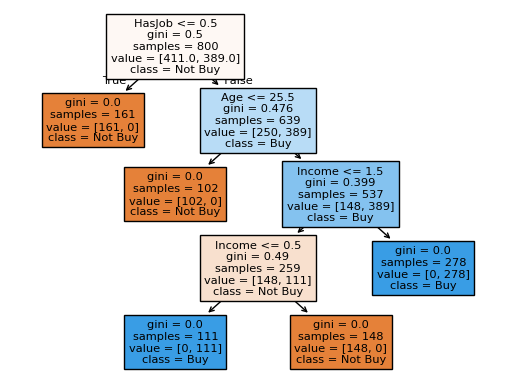

In [132]:
plot_tree(decision_tree=model,feature_names=X.columns,class_names=['Not Buy','Buy'],filled=True)